<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 6113875

In [ ]:
! pip install tensorflow-graphics

# Undistorted Points - Iterative

error: 0.20
error: 0.04
error: 0.00
1.0 1.1500000000000001 0.8879057101562501


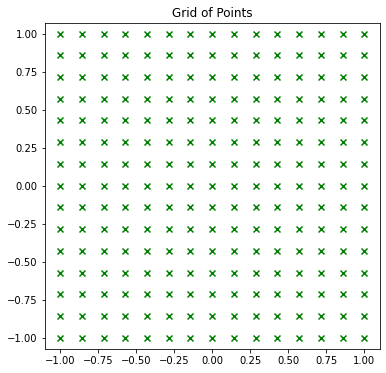

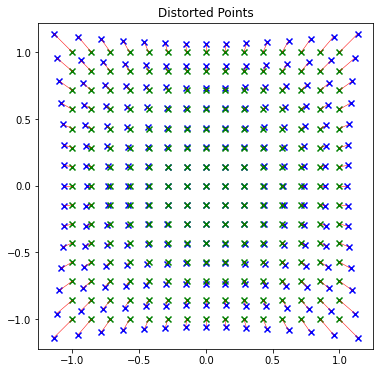

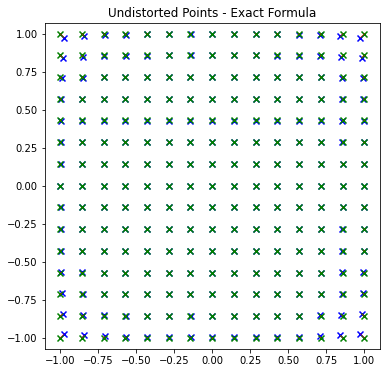

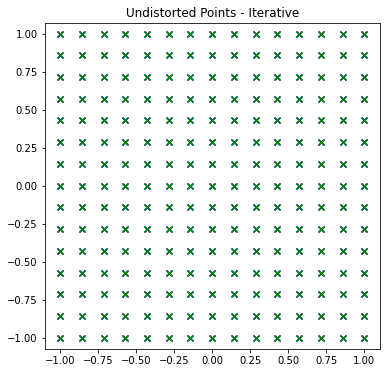

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def grid_2d(row, col):
    pts = np.zeros([2, row * col])
    cx, cy = (col - 1) * .5, (row - 1) * .5
    for i in range(row * col):
        pts[:, i] = i % col - cx, i // col - cy
    # pts in interval [-1,1]
    return pts / pts.max()

def apply_distortion(pts, k1, k2):
    r2 = np.square(pts).sum(0)
    f = 1 + k1 * r2 + k2 * r2**2
    return pts * f

def remove_distortion(pts, k1, k2):
    # as described in the paper
    b1, b2 = -k1, 3 * k1**2 - k2
    return apply_distortion(pts, b1, b2)

def remove_distortion_iter(points, k1, k2):
    # as used in e.g. matlab calibration tookit
    pts = ptsd = points
    for _ in range(5):
        r2 = np.square(pts).sum(0)
        f = 1 + k1 * r2 + k2 * r2**2
        pts = ptsd / f
    return pts

def plot_compare(ax, a, b, arrow=True):
    ax.scatter(*b, marker='x', c='b')
    ax.scatter(*a, marker='x', c='g')
    error = np.sqrt(np.square(a-b).sum(0).max())
    print('error: {:0.2f}'.format(error))
    if not arrow:
        return
    for (x, y), (bx, by) in zip(a.T, b.T):
        ax.plot([x, bx], [y, by], color='r', lw=0.5)

k1, k2 = 0.05, 0.01

pts = grid_2d(15, 15)
fig, ax = plt.subplots(1, figsize=[6,6])
ax.axis('equal')
ax.set_title('Grid of Points')
ax.scatter(*pts, marker='x', c='g');

d = apply_distortion(pts, k1, k2)
a, b = pts, d

fig, ax = plt.subplots(1, figsize=[6,6])
ax.axis('equal')
ax.set_title('Distorted Points')
plot_compare(ax, a, b)

u = remove_distortion(d, k1, k2)
a, b = pts, u

fig, ax = plt.subplots(1, figsize=[6,6])
ax.axis('equal')
ax.set_title('Undistorted Points - Exact Formula')
plot_compare(ax, a, b)

ui = remove_distortion_iter(d, k1, k2)
a, b = pts, ui

fig, ax = plt.subplots(1, figsize=[6,6])
ax.set_title('Undistorted Points - Iterative')
ax.axis('equal')
plot_compare(ax, a, b)

k1, k2 = 0.05, 0.1
b1, b2 = -k1, 3 * k1**2 - k2

# distort
r = 1.
r2 = r**2
r4 = r2**2
f = 1 + k1 * r2 + k2 * r4
r_prime = r*f

# undistort
r_p1 = r_prime
r_p2 = r_p1**2
r_p4 = r_p1**4
f_prime = 1 + b1 * r_p2 + b2 * r_p4

rr_prime = r_p1 * f_prime

# not actually inverting values...
print(r, r_prime, rr_prime)

# Tensorflow 이미지셋 만들기

# Test_1_ready

https://mj-lahong.tistory.com/82?category=878479

In [ ]:
! pip install sklearn

In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


# Test_2

https://maktubi.tistory.com/52

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from glob import glob

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 3s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count) #총 3670개의 이미지가 있다.

3670


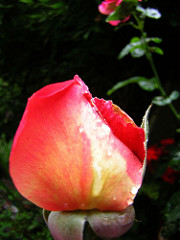

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

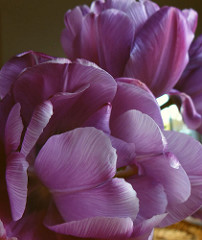

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #training:validation set의 비율이 80:20
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names 
# 데이터셋의 클래스 이름을 class_names에 저장한다. 알파벳 순서의 디렉토리 이름에 해당한다.
print(class_names)

# 실행결과
# ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## 데이터 시각화

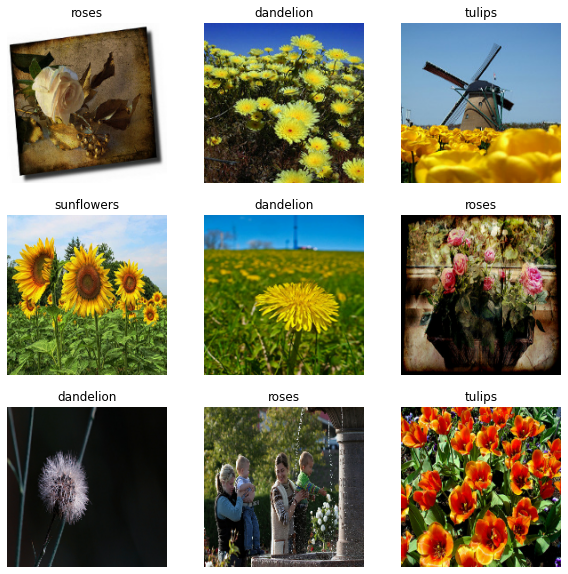

In [ ]:
# 훈련 데이터셋의 처음 9개의 이미지 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 100s 1s/step - loss: 1.4441 - accuracy: 0.3920 - val_loss: 1.3112 - val_accuracy: 0.4496
Epoch 2/10
92/92 [==============================] - 95s 1s/step - loss: 1.0838 - accuracy: 0.5746 - val_loss: 1.0121 - val_accuracy: 0.5858
Epoch 3/10
92/92 [==============================] - 95s 1s/step - loss: 0.8578 - accuracy: 0.6730 - val_loss: 0.9502 - val_accuracy: 0.6226
Epoch 4/10
92/92 [==============================] - 95s 1s/step - loss: 0.6691 - accuracy: 0.7558 - val_loss: 0.9454 - val_accuracy: 0.6444
Epoch 5/10
92/92 [==============================] - 95s 1s/step - loss: 0.4373 - accuracy: 0.8392 - val_loss: 0.9947 - val_accuracy: 0.6512
Epoch 6/10
92/92 [==============================] - 95s 1s/step - loss: 0.2615 - accuracy: 0.9145 - val_loss: 1.2097 - val_accuracy: 0.6362
Epoch 7/10
92/92 [==============================] - 95s 1s/step - loss: 0.1467 - accuracy: 0.9513 - val_loss: 1.3778 - val_accuracy: 0.6499
Epoch 8/10
92/92 [=

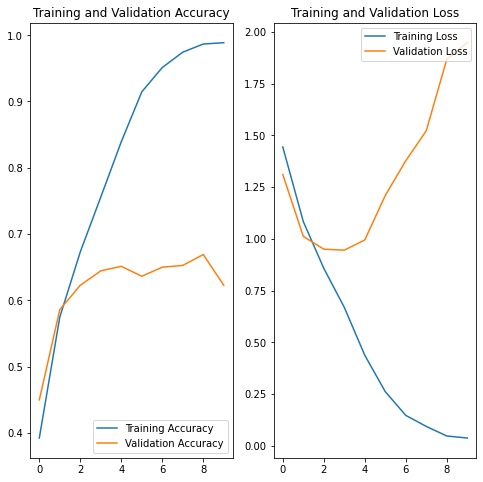

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

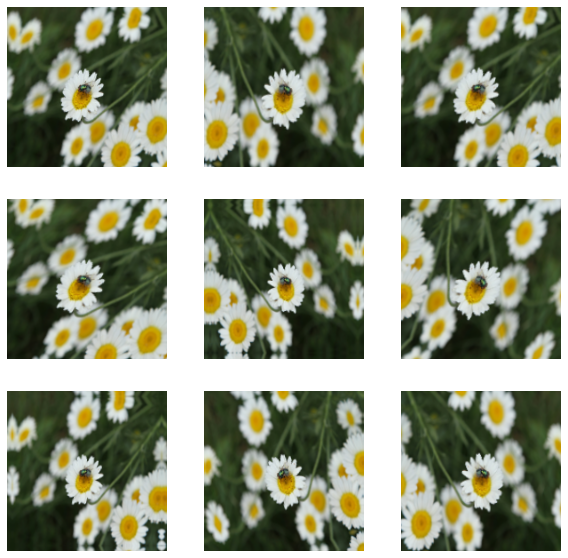

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15 # was 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 113s 1s/step - loss: 1.2768 - accuracy: 0.4649 - val_loss: 1.0825 - val_accuracy: 0.5559
Epoch 2/15
92/92 [==============================] - 110s 1s/step - loss: 0.9874 - accuracy: 0.6182 - val_loss: 0.9330 - val_accuracy: 0.6403
Epoch 3/15
92/92 [==============================] - 109s 1s/step - loss: 0.9159 - accuracy: 0.6417 - val_loss: 0.9185 - val_accuracy: 0.6376
Epoch 4/15
92/92 [==============================] - 109s 1s/step - loss: 0.8644 - accuracy: 0.6638 - val_loss: 0.9636 - val_accuracy: 0.6431
Epoch 5/15
92/92 [==============================] - 109s 1s/step - loss: 0.7855 - accuracy: 0.6979 - val_loss: 0.7884 - val_accuracy: 0.7030
Epoch 6/15
92/92 [==============================] - 108s 1s/step - loss: 0.7452 - accuracy: 0.7183 - val_loss: 0.8275 - val_accuracy: 0.6703
Epoch 7/15
92/92 [==============================] - 109s 1s/step - loss: 0.7036 - accuracy: 0.7357 - val_loss: 0.7705 - val_accuracy: 0.7084
Epoch 8/15
92

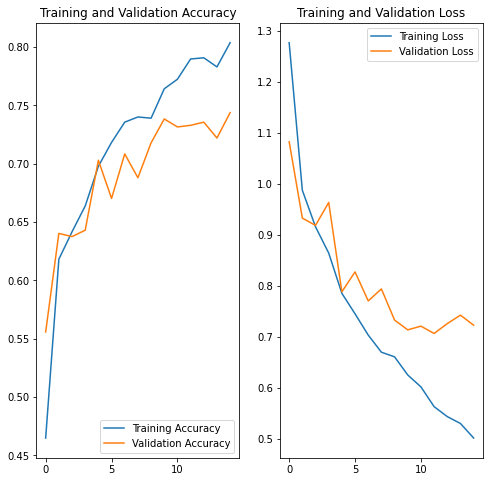

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## result checking

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

131072/117948 [=================================] - 0s 0us/step
This image most likely belongs to sunflowers with a 99.15 percent confidence.


# Test_3 이미지 분류

https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

https://github.com/mckang6113875/AP_Test_OPEN.git

! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

In [ ]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 513, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 513 (delta 48), reused 63 (delta 27), pack-reused 419
Receiving objects: 100% (513/513), 225.51 MiB | 33.82 MiB/s, done.
Resolving deltas: 100% (322/322), done.


In [91]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from glob import glob

In [92]:
# 기본 경로
base_dir = '/content/AP_Test_OPEN/SVM'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 전방/후방 이미지 경로
train_distorted_dir = os.path.join(train_dir, 'distorted')
train_undistorted_dir = os.path.join(train_dir, 'undistorted')
print(train_distorted_dir)
print(train_undistorted_dir)

# 테스트에 사용되는 전방/후방 이미지 경로
validation_distorted_dir = os.path.join(validation_dir, 'distorted')
validation_undistorted_dir = os.path.join(validation_dir, 'undistorted')
print(validation_distorted_dir)
print(validation_undistorted_dir)

/content/AP_Test_OPEN/SVM/train/distorted
/content/AP_Test_OPEN/SVM/train/undistorted
/content/AP_Test_OPEN/SVM/validation/distorted
/content/AP_Test_OPEN/SVM/validation/undistorted


In [93]:
train_distorted_fnames = os.listdir( train_distorted_dir )
train_undistorted_fnames = os.listdir( train_undistorted_dir )

print(train_distorted_fnames[:10])
print(train_undistorted_fnames[:10])

['d3.jpg', 'd2.png', 'd4.jpg', 'd7.jpg', 'd6.jpg', 'd9.jpg', 'd8.jpg', 'd1.png', 'd5.jpg', 'd10.jpg']
['ud8.png', 'ud9.png', 'ud2.png', 'ud10.png', 'ud3.png', 'ud5.png', 'ud6.png', 'ud7.png', 'ud4.png', 'ud1.png']


In [94]:
print('Total training distorted images :', len(os.listdir(train_distorted_dir)))
print('Total training undistorted images :', len(os.listdir(train_undistorted_dir)))

print('Total validation distorted images :', len(os.listdir(validation_distorted_dir)))
print('Total validation undistorted images :', len(os.listdir(validation_undistorted_dir)))

Total training distorted images : 10
Total training undistorted images : 10
Total validation distorted images : 10
Total validation undistorted images : 10


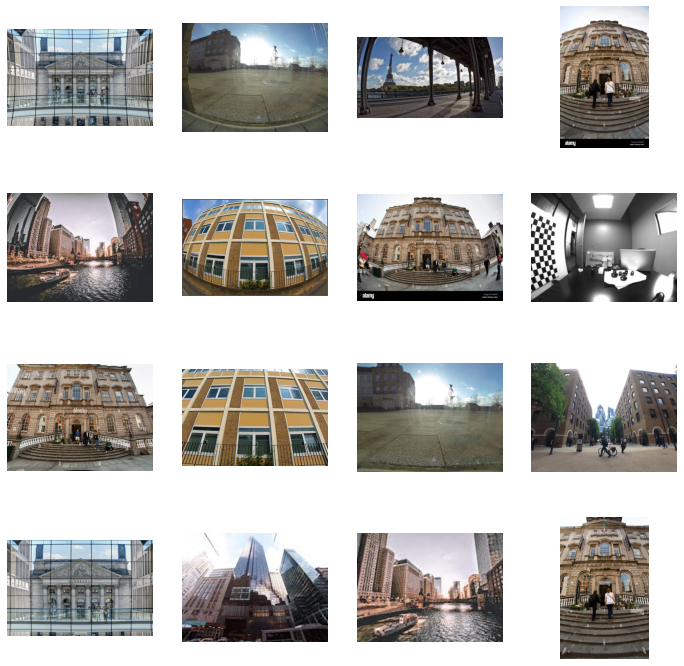

In [95]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_distorted_pix = [os.path.join(train_distorted_dir, fname)
                for fname in train_distorted_fnames[ pic_index-8:pic_index]]

next_undistorted_pix = [os.path.join(train_undistorted_dir, fname)
                for fname in train_undistorted_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_distorted_pix+next_undistorted_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [96]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 64)      

In [97]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [98]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
#
#train_datagen = ImageDataGenerator( rescale = 1.0/255. )
#test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
#
#train_generator = train_datagen.flow_from_directory(train_dir,
#                                                  batch_size=20,
#                                                  class_mode='binary',
#                                                  target_size=(150, 150))
#validation_generator =  test_datagen.flow_from_directory(validation_dir,
#                                                       batch_size=20,
#                                                       class_mode  = 'binary',
#                                                       target_size = (150, 150))
#
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=4,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=4,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [99]:
#history = model.fit(train_generator,
#                    validation_data=validation_generator,
#                    steps_per_epoch=100,
#                    epochs=100,
#                    validation_steps=50,
#                    verbose=2)
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=5, #Kang, steps_per_epoch = len()//batch_size
                    epochs=15, #was 10
                    validation_steps=5, #Kang
                    verbose=2) #2 = one line per epoch.

Epoch 1/15
5/5 - 3s - loss: 7.3811 - accuracy: 0.1500 - val_loss: 0.7761 - val_accuracy: 0.5000 - 3s/epoch - 620ms/step
Epoch 2/15
5/5 - 2s - loss: 0.7807 - accuracy: 0.3500 - val_loss: 0.6662 - val_accuracy: 0.5000 - 2s/epoch - 399ms/step
Epoch 3/15
5/5 - 2s - loss: 0.6859 - accuracy: 0.4500 - val_loss: 0.6313 - val_accuracy: 0.6000 - 2s/epoch - 396ms/step
Epoch 4/15
5/5 - 2s - loss: 0.7575 - accuracy: 0.4500 - val_loss: 0.5980 - val_accuracy: 0.8000 - 2s/epoch - 401ms/step
Epoch 5/15
5/5 - 2s - loss: 0.6770 - accuracy: 0.7000 - val_loss: 0.5504 - val_accuracy: 0.7000 - 2s/epoch - 406ms/step
Epoch 6/15
5/5 - 2s - loss: 0.7247 - accuracy: 0.6500 - val_loss: 0.5249 - val_accuracy: 0.8500 - 2s/epoch - 393ms/step
Epoch 7/15
5/5 - 2s - loss: 0.4889 - accuracy: 1.0000 - val_loss: 0.3838 - val_accuracy: 0.9500 - 2s/epoch - 394ms/step
Epoch 8/15
5/5 - 2s - loss: 0.5592 - accuracy: 0.7500 - val_loss: 0.3291 - val_accuracy: 0.9500 - 2s/epoch - 388ms/step
Epoch 9/15
5/5 - 2s - loss: 0.3180 - acc

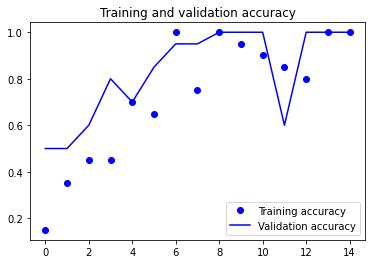

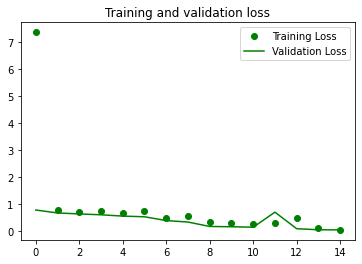

In [100]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [101]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():

  path='/content/' + fn
  
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a undistorted")
  else:
    print(fn + " is a distorted")


# Test_4 데이터 증강

https://www.tensorflow.org/tutorials/images/data_augmentation?hl=ko

https://codetorial.net/tensorflow/image_augmentation.html

https://codetorial.net/tensorflow/transfer_learning.html

In [ ]:
#! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

In [102]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
  -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-07-01 04:53:22--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.211.128, 173.194.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   298MB/s    in 0.3s    

2022-07-01 04:53:23 (298 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [103]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                              include_top=False,
                              weights=None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_103 (Conv2D)            (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_103[0][0]']             
 ormalization)                                                                                    
                                                                                       

In [104]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [105]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## core

In [106]:
# 6113875
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define our example directories and files
base_dir = '/content/AP_Test_OPEN/SVM'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_distorted_dir = os.path.join(train_dir, 'distorted')
train_undistorted_dir = os.path.join(train_dir, 'undistorted')
validation_distorted_dir = os.path.join(validation_dir, 'distorted')
validation_undistorted_dir = os.path.join(validation_dir, 'undistorted')

train_distorted_fnames = os.listdir(train_distorted_dir)
train_undistorted_fnames = os.listdir(train_undistorted_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=4, #was 20
                                                  class_mode='binary',
                                                  target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=4, #was 20
                                                      class_mode='binary',
                                                      target_size=(150, 150))

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [107]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=5, #Kang, steps_per_epoch = len()//batch_size
  epochs=10,
  validation_steps=5,
  verbose=2
)

Epoch 1/10
5/5 - 10s - loss: 2.1716 - accuracy: 0.4500 - val_loss: 0.6439 - val_accuracy: 0.5500 - 10s/epoch - 2s/step
Epoch 2/10
5/5 - 5s - loss: 0.6165 - accuracy: 0.7000 - val_loss: 0.8810 - val_accuracy: 0.5000 - 5s/epoch - 948ms/step
Epoch 3/10
5/5 - 4s - loss: 1.4831 - accuracy: 0.3000 - val_loss: 0.4848 - val_accuracy: 0.8000 - 4s/epoch - 776ms/step
Epoch 4/10
5/5 - 4s - loss: 0.5056 - accuracy: 0.8500 - val_loss: 0.7564 - val_accuracy: 0.6000 - 4s/epoch - 788ms/step
Epoch 5/10
5/5 - 4s - loss: 0.7410 - accuracy: 0.6500 - val_loss: 0.5964 - val_accuracy: 0.6000 - 4s/epoch - 773ms/step
Epoch 6/10
5/5 - 4s - loss: 0.5100 - accuracy: 0.7500 - val_loss: 0.3715 - val_accuracy: 0.8500 - 4s/epoch - 779ms/step
Epoch 7/10
5/5 - 4s - loss: 0.7334 - accuracy: 0.5000 - val_loss: 0.2968 - val_accuracy: 0.9500 - 4s/epoch - 784ms/step
Epoch 8/10
5/5 - 4s - loss: 0.4966 - accuracy: 0.7500 - val_loss: 0.3143 - val_accuracy: 0.8000 - 4s/epoch - 784ms/step
Epoch 9/10
5/5 - 4s - loss: 0.6026 - accu

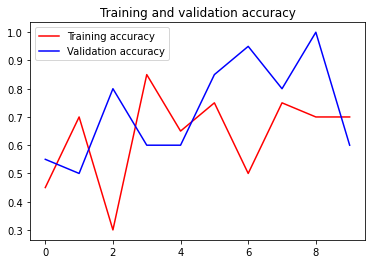

<Figure size 432x288 with 0 Axes>

In [108]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

## 데이터 모집단/모수 보강하고, 통계치 신뢰성 확인 필요함

# 6113875 Front-Rear

In [1]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 529, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 529 (delta 57), reused 63 (delta 27), pack-reused 419
Receiving objects: 100% (529/529), 240.74 MiB | 31.50 MiB/s, done.
Resolving deltas: 100% (331/331), done.


In [109]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from glob import glob

In [110]:
# 기본 경로
base_dir = '/content/AP_Test_OPEN/SVM_FR'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 전방/후방 이미지 경로
train_F_dir = os.path.join(train_dir, 'F')
train_R_dir = os.path.join(train_dir, 'R')
print(train_F_dir)
print(train_R_dir)

# 테스트에 사용되는 전방/후방 이미지 경로
validation_F_dir = os.path.join(validation_dir, 'F')
validation_R_dir = os.path.join(validation_dir, 'R')
print(validation_F_dir)
print(validation_R_dir)

/content/AP_Test_OPEN/SVM_FR/train/F
/content/AP_Test_OPEN/SVM_FR/train/R
/content/AP_Test_OPEN/SVM_FR/validation/F
/content/AP_Test_OPEN/SVM_FR/validation/R


In [111]:
train_F_fnames = os.listdir( train_F_dir )
train_R_fnames = os.listdir( train_R_dir )

print(train_F_fnames[:14])
print(train_R_fnames[:14])

['F8.bmp', 'F5.png', 'F10.bmp', 'F28.bmp', 'F22.bmp', 'F21.bmp', 'F9.bmp', 'F18.bmp', 'F6.bmp', 'F23.bmp', 'F7.bmp', 'F11.bmp', 'F25.bmp', 'F24.bmp']
['R25.bmp', 'R21.bmp', 'R31.bmp', 'R16.bmp', 'R00.bmp', 'R29.bmp', 'R30.bmp', 'R18.bmp', 'R27.bmp', 'R22.bmp', 'R13.bmp', 'R28.bmp', 'R6.bmp', 'R15.bmp']


In [112]:
print('Total training F images :', len(os.listdir(train_F_dir)))
print('Total training R images :', len(os.listdir(train_R_dir)))

print('Total validation F images :', len(os.listdir(validation_F_dir)))
print('Total validation R images :', len(os.listdir(validation_R_dir)))

Total training F images : 14
Total training R images : 14
Total validation F images : 14
Total validation R images : 14


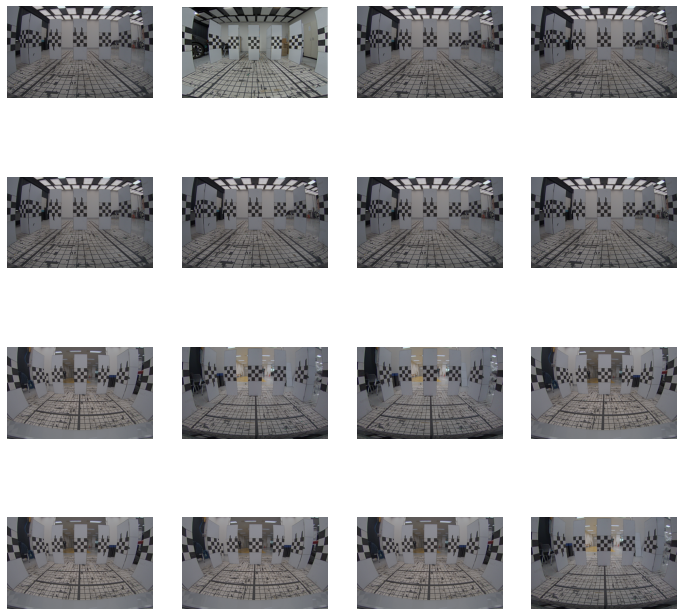

In [113]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_F_pix = [os.path.join(train_F_dir, fname)
                for fname in train_F_fnames[ pic_index-8:pic_index]]

next_R_pix = [os.path.join(train_R_dir, fname)
                for fname in train_R_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_F_pix+next_R_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [114]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_197 (Conv2D)         (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_198 (Conv2D)         (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_199 (Conv2D)         (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 17, 17, 64)      

In [115]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [116]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
#
#train_datagen = ImageDataGenerator( rescale = 1.0/255. )
#test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
#
#train_generator = train_datagen.flow_from_directory(train_dir,
#                                                  batch_size=20,
#                                                  class_mode='binary',
#                                                  target_size=(150, 150))
#validation_generator =  test_datagen.flow_from_directory(validation_dir,
#                                                       batch_size=20,
#                                                       class_mode  = 'binary',
#                                                       target_size = (150, 150))
#
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=4, #4
                                                  class_mode ='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=4, #4
                                                       class_mode = 'binary',
                                                       target_size = (150, 150))

Found 28 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


In [117]:
#history = model.fit(train_generator,
#                    validation_data=validation_generator,
#                    steps_per_epoch=100,
#                    epochs=100,
#                    validation_steps=50,
#                    verbose=2)
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=5, #5 Kang, steps_per_epoch = len()//batch_size
                    epochs=10, #was 15, 10
                    validation_steps=5, # 5 Kang
                    verbose=2) #2 = one line per epoch.

Epoch 1/10
5/5 - 3s - loss: -1.7443e+02 - accuracy: 0.5500 - val_loss: -1.6849e+03 - val_accuracy: 0.5000 - 3s/epoch - 561ms/step
Epoch 2/10
5/5 - 2s - loss: -9.6582e+03 - accuracy: 0.4500 - val_loss: -2.0048e+04 - val_accuracy: 0.6000 - 2s/epoch - 313ms/step
Epoch 3/10
5/5 - 2s - loss: -5.5499e+04 - accuracy: 0.4500 - val_loss: -1.1097e+05 - val_accuracy: 0.4500 - 2s/epoch - 307ms/step
Epoch 4/10
5/5 - 2s - loss: -1.5256e+05 - accuracy: 0.5000 - val_loss: -2.5554e+05 - val_accuracy: 0.5000 - 2s/epoch - 302ms/step
Epoch 5/10
5/5 - 2s - loss: -4.0519e+05 - accuracy: 0.4500 - val_loss: -5.6994e+05 - val_accuracy: 0.5000 - 2s/epoch - 310ms/step
Epoch 6/10
5/5 - 2s - loss: -8.1266e+05 - accuracy: 0.4500 - val_loss: -1.1586e+06 - val_accuracy: 0.4500 - 2s/epoch - 308ms/step
Epoch 7/10
5/5 - 2s - loss: -1.1371e+06 - accuracy: 0.5500 - val_loss: -1.8208e+06 - val_accuracy: 0.4500 - 2s/epoch - 307ms/step
Epoch 8/10
5/5 - 2s - loss: -2.2154e+06 - accuracy: 0.4500 - val_loss: -2.6098e+06 - val_a

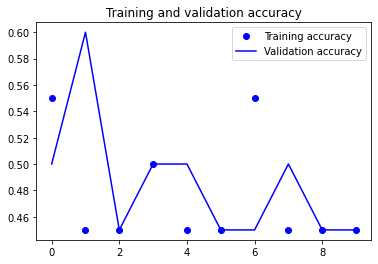

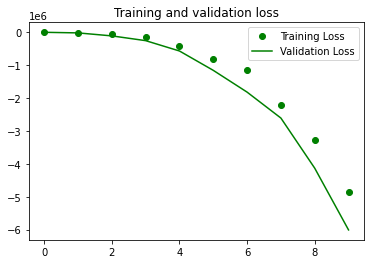

In [118]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
#

In [119]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
  -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-07-01 04:58:49--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   196MB/s    in 0.4s    

2022-07-01 04:58:50 (196 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [120]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                              include_top=False,
                              weights=None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_200 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_200[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [121]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [122]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## core

In [123]:
# 6113875
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define our example directories and files
base_dir = '/content/AP_Test_OPEN/SVM_FR'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_F_dir = os.path.join(train_dir, 'F')
train_R_dir = os.path.join(train_dir, 'R')
validation_F_dir = os.path.join(validation_dir, 'F')
validation_R_dir = os.path.join(validation_dir, 'R')

train_F_fnames = os.listdir(train_F_dir)
train_R_fnames = os.listdir(train_R_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=4, #was 20
                                                  class_mode='binary',
                                                  target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=4, #was 20
                                                      class_mode='binary',
                                                      target_size=(150, 150))

Found 28 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


In [124]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=5, #Kang, steps_per_epoch = len()//batch_size
  epochs=10,
  validation_steps=5,
  verbose=2
)

Epoch 1/10
5/5 - 9s - loss: -9.6450e+00 - accuracy: 0.4000 - val_loss: -2.0264e+01 - val_accuracy: 0.5500 - 9s/epoch - 2s/step
Epoch 2/10
5/5 - 3s - loss: -2.8543e+01 - accuracy: 0.5000 - val_loss: -3.8483e+01 - val_accuracy: 0.5000 - 3s/epoch - 693ms/step
Epoch 3/10
5/5 - 3s - loss: -3.8855e+01 - accuracy: 0.5500 - val_loss: -5.1258e+01 - val_accuracy: 0.5000 - 3s/epoch - 685ms/step
Epoch 4/10
5/5 - 3s - loss: -4.8229e+01 - accuracy: 0.5500 - val_loss: -5.8187e+01 - val_accuracy: 0.5500 - 3s/epoch - 682ms/step
Epoch 5/10
5/5 - 4s - loss: -7.5772e+01 - accuracy: 0.4500 - val_loss: -8.0306e+01 - val_accuracy: 0.5000 - 4s/epoch - 842ms/step
Epoch 6/10
5/5 - 3s - loss: -8.3012e+01 - accuracy: 0.5000 - val_loss: -7.5650e+01 - val_accuracy: 0.6000 - 3s/epoch - 689ms/step
Epoch 7/10
5/5 - 3s - loss: -9.2577e+01 - accuracy: 0.5000 - val_loss: -1.0732e+02 - val_accuracy: 0.5000 - 3s/epoch - 680ms/step
Epoch 8/10
5/5 - 3s - loss: -1.1018e+02 - accuracy: 0.5000 - val_loss: -1.2185e+02 - val_accu

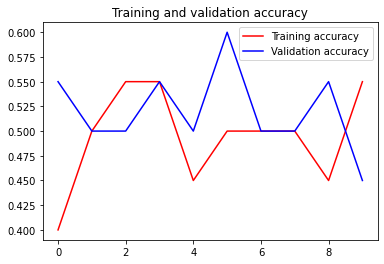

<Figure size 432x288 with 0 Axes>

In [125]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# 최종 이미지 선택하기

In [88]:
# 6113875
import random
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

class WorldCup:
    filenamelist=os.listdir('/content/AP_Test_OPEN/SVM_FR/train/F/') # /content/AP_Test_OPEN/SVM_FR/train/F
    c1=-1  #최종 선택이미지
    c2=[]  #2강
    c4=[]  #4강
    c8=[]  #8강
    c16=[] #16강
    c32=[] #32강
    c64=[] #64강
    c128=[]#128강
    c0=[]  #처음에 사용자가 입력한 round에 따른 초기화 값을 저정함.
    cm_db=[]#이미지 데이터 베이스 
    c_cup={1:c1, 2:c2, 4:c4, 8:c8, 16:c16, 32:c32, 64:c64, 128:c128}
    fname=[]#파일이름
    z={1:128,2:64,3:32,4:16,5:8,6:4,7:2}
  
    ### 그림 파일 이름을 받아와서 랜덤하게 섞이.
    def db_setting(self): 
        for filenames in self.filenamelist:
            self.fname.append(filenames)
            random.shuffle(self.fname)
    
    ### 변수 값을 초기화하기
    def value_setting(self):
        self.c1=-1
        self.c2.clear()
        self.c4.clear()
        self.c8.clear()
        self.c16.clear()
        self.c32.clear()
        self.c64.clear()
        self.c128.clear()
        self.c0.clear()
        self.cm_db.clear()
        self.fname.clear()
        self.c_cup={1:self.c1, 2:self.c2, 4:self.c4, 8:self.c8, 16:self.c16, 32:self.c32, 64:self.c64, 128:self.c128}
    
    ### 게임을 수행하는 부분. 
    def select_items(self,round): #round로 올 수 있는 값 : 128/64/32/16/8/4/2
        if round == 2: 
            print("\n[ 최종 결정 ]")
        else :
            print("============================")
            print("\n[ 시작 ]".format(round))
            print("============================")
            random.shuffle(self.c_cup[round]) # 현재 round 시작 전에 리스트의 값을 랜덤하게 섞어준다.
        get_name=lambda x:x.split('.')[0]     # 파일명만 가져오도록 하는 간단한 함수.
        
        for i in range(0, round, 2):
            print("\n{}강 {}/{}: {}. {} vs {}. {}".
                  format(round,                                          # 몇 강
                         int((i+2)/2),int(round/2),                      # 대결의 몇번 째/전체 대결 수
                         i+1,get_name(self.fname[self.c_cup[round][i]]), # 선택할 숫자1. 포켓몬이름
                         i+2,get_name(self.fname[self.c_cup[round][i+1]])# 선택할 숫자2. 포켓몬이름
                        )
                 )
            ### 사진 보여주는 코드 ### 
            ### 첫번 째 사진
            fig=figure()
            pokemon1='/content/AP_Test_OPEN/SVM_FR/train/F/'+self.fname[self.c_cup[round][i]]
            a=fig.add_subplot(1,2,1)
            image=imread(pokemon1)
            imshow(image)
            axis('off')
            ### 두번 째 사진
            pokemon2='/content/AP_Test_OPEN/SVM_FR/train/F/'+self.fname[self.c_cup[round][i+1]]
            a=fig.add_subplot(1,2,2)
            image=imread(pokemon2)
            imshow(image)
            axis('off')
            plt.show()

            ### 사용자들한테 입력받기 ###
            while True :
                left_number= i+1
                right_number= i+2
                user_selected_number=int(input("- 번호를 입력해 주세요: "))
                if user_selected_number==left_number or user_selected_number==right_number: break # 올바른숫자를 입력하면 while문을 나감.
                else: print("숫자를 잘못 입력했습니다. 다시입력해 주세요.")
            if user_selected_number==left_number : original_db_number=self.c_cup[round][i] # 사용자가 왼쪽 사진을 선택
            else : original_db_number=self.c_cup[round][i+1] #사용자가 오른쪽 사진을 선택

            if round==2 : # 결승전일 때
                self.c_cup[int(round/2)]=original_db_number # int(round/2) = 1
                print("\n★[최종 선택된 이미지]★")
                print("1위: ", get_name(self.fname[self.c_cup[int(round/2)]]))
                ### 최종 사진 ###
                fig=figure()
                image=imread('/content/AP_Test_OPEN/SVM_FR/train/F/'+self.fname[self.c_cup[int(round/2)]])
                imshow(image)
                axis('off')
                plt.show()
                print("============================")
            else : # 결승전이 아닌 일반적인 경우일 때
                self.c_cup[int(round/2)].append(original_db_number) # 현재 round에서 선택한 결과를 다음 round의 리스트에 추가(append)한다.
        if round!=2 :        
            round=int(round/2)
            self.select_items(round)
    
    def round_setting(self): #round수 선택 받고, 초기화하기
        round_num=0
        self.value_setting() # 변수들 초기화
        self.db_setting()    # 포켓몬db 초기화하기
    
        ### round setting ###
        while True: # Round 선택받기 128/64/32/16/8/4/2     
            print("\n[ 더 나은 뷰 튜닝 이미지 선택하기 ]")
            print("============================")
            
            round_num=int(input("몇 강으로 할지 선택해 주세요\n- 1. 128강\n- 2. 64강\n- 3. 32강\n- 4. 16강\n- 5. 8강\n- 6. 4강\n- 7. 2강\n(숫자 입력하기) > "))
        
            if round_num in self.z.keys() : break
            else : print("\n[error]\n없는 숫자입니다. 다시 입력해 주세요.\n")
        # 선택값으로 초기화하기
        rounds=self.z[round_num]
        for round in range(rounds):
            self.c0.append(round)
        self.c_cup[rounds]=self.c0 # 초기화한 값
        ### rounds 입력값에 따른 select_items 매서드 시작 ###
        self.select_items(rounds)

    def start_game(self):
        self.round_setting()


[ 더 나은 뷰 튜닝 이미지 선택하기 ]
몇 강으로 할지 선택해 주세요
- 1. 128강
- 2. 64강
- 3. 32강
- 4. 16강
- 5. 8강
- 6. 4강
- 7. 2강
(숫자 입력하기) > 5

[ 시작 ]

8강 1/4: 1. F28 vs 2. F10


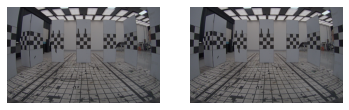

- 번호를 입력해 주세요: 1

8강 2/4: 3. F7 vs 4. F18


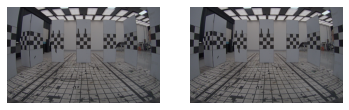

- 번호를 입력해 주세요: 3

8강 3/4: 5. F24 vs 6. F8


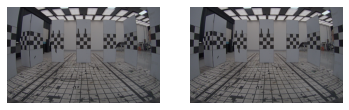

- 번호를 입력해 주세요: 5

8강 4/4: 7. F25 vs 8. F9


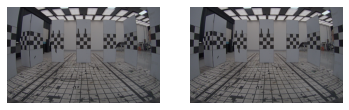

- 번호를 입력해 주세요: 7

[ 시작 ]

4강 1/2: 1. F7 vs 2. F28


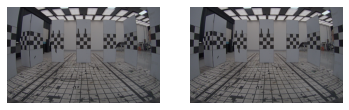

- 번호를 입력해 주세요: 1

4강 2/2: 3. F24 vs 4. F25


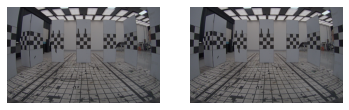

- 번호를 입력해 주세요: 3

[ 최종 결정 ]

2강 1/1: 1. F7 vs 2. F24


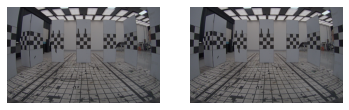

- 번호를 입력해 주세요: 1

★[최종 선택된 이미지]★
1위:  F7


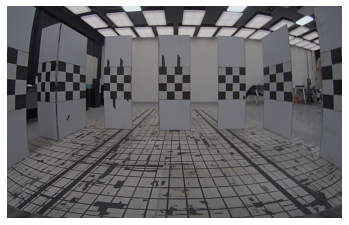

In [90]:
a=WorldCup()
a.start_game()